In [48]:
import numpy as np
import pandas as pd
import os

In [49]:
for dirpath, dirnames, filenames in os.walk('titanic'):
    for filename in filenames:
        print(os.path.join(dirpath, filename))

titanic\gender_submission.csv
titanic\test.csv
titanic\train.csv


In [50]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')
gender= pd.read_csv('titanic/gender_submission.csv')

In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [53]:
train.drop(['PassengerId','Name','Ticket','Cabin','Embarked','Fare'],axis=1,inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [54]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [55]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [56]:
test.drop(['PassengerId','Name','Ticket','Cabin','Embarked','Fare'],axis=1,inplace=True)
test.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0
2,2,male,62.0,0,0
3,3,male,27.0,0,0
4,3,female,22.0,1,1


In [57]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [58]:
gender.isna().sum()

PassengerId    0
Survived       0
dtype: int64

In [59]:
gender.drop(['PassengerId'],axis=1,inplace=True)
gender.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [60]:
train.fillna(train['Age'].median(),inplace=True)
train[train['Age'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch


In [61]:
test.fillna(test['Age'].median(),inplace=True)
test[test['Age'].isna()]

,Pclass,Sex,Age,SibSp,Parch


In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
train['Sex']=LabelEncoder().fit_transform(train['Sex'])
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [64]:
test['Sex']=LabelEncoder().fit_transform(test['Sex'])
test.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,1,34.5,0,0
1,3,0,47.0,1,0
2,2,1,62.0,0,0
3,3,1,27.0,0,0
4,3,0,22.0,1,1


In [73]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score

In [69]:
x_train = train.drop(['Survived'],axis=1)
y_train = train['Survived']
x_test = test
y_test = gender

In [71]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

In [75]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f"Random Forest - Accuracy: {accuracy}, F1: {f1}, Recall: {recall}, Precision: {precision}")

Random Forest - Accuracy: 0.7057416267942583, F1: 0.6475644699140402, Recall: 0.743421052631579, Precision: 0.5736040609137056


In [77]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.68      0.75       266
           1       0.57      0.74      0.65       152

    accuracy                           0.71       418
   macro avg       0.70      0.71      0.70       418
weighted avg       0.73      0.71      0.71       418



In [83]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [21:56:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [84]:
accuracy = accuracy_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)
recall = recall_score(y_test, xgb_pred)
precision = precision_score(y_test, xgb_pred)
print(f"Xgb - Accuracy: {accuracy}, F1: {f1}, Recall: {recall}, Precision: {precision}")

Xgb - Accuracy: 0.7583732057416268, F1: 0.7138810198300283, Recall: 0.8289473684210527, Precision: 0.6268656716417911


In [85]:
report = classification_report(y_test, xgb_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.72      0.79       266
           1       0.63      0.83      0.71       152

    accuracy                           0.76       418
   macro avg       0.75      0.77      0.75       418
weighted avg       0.79      0.76      0.76       418



In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'XGBoost - Feature Importance')

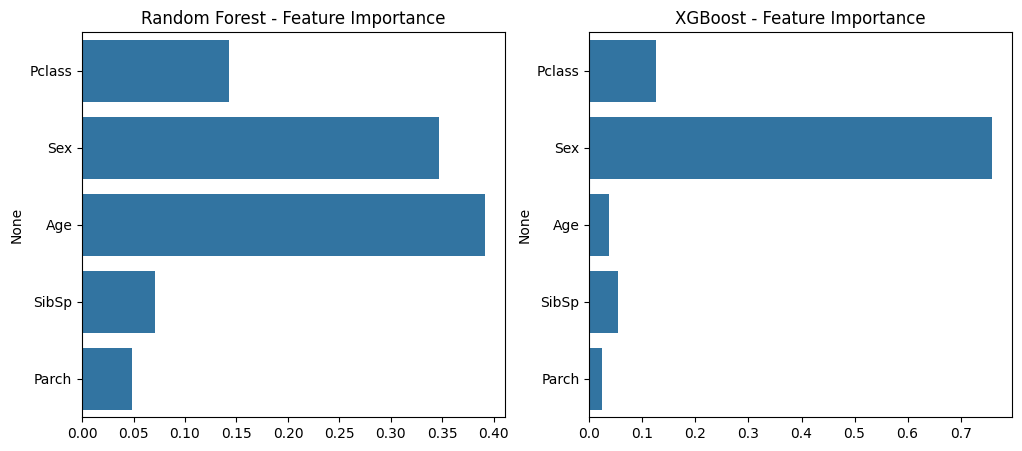

In [ ]:

rf_importance = random_forest.feature_importances_
xgb_importance = xgb_model.feature_importances_
feature_names = x_train.columns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=rf_importance, y=feature_names)
plt.title("Random Forest - Feature Importance")

plt.subplot(1, 2, 2)
sns.barplot(x=xgb_importance, y=feature_names)
plt.title("XGBoost - Feature Importance")

In [90]:
from sklearn.model_selection import GridSearchCV

In [94]:
# Mô hình và lưới tham số
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Huấn luyện
grid_search.fit(x_train, y_train)

# Kết quả tốt nhất
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}
Best Accuracy: 0.8260381593714928


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [22:21:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
